<a href="https://colab.research.google.com/github/ella13162/DataScience/blob/main/ds_week_7_logistic_regression_student_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies
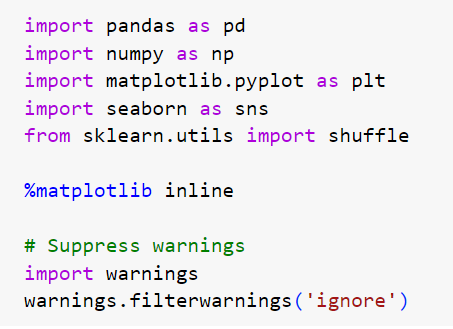

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

%matplotlib inline

#supress warining
import warnings
warnings.filterwarnings('ignore')

# Read in the data and shuffle it
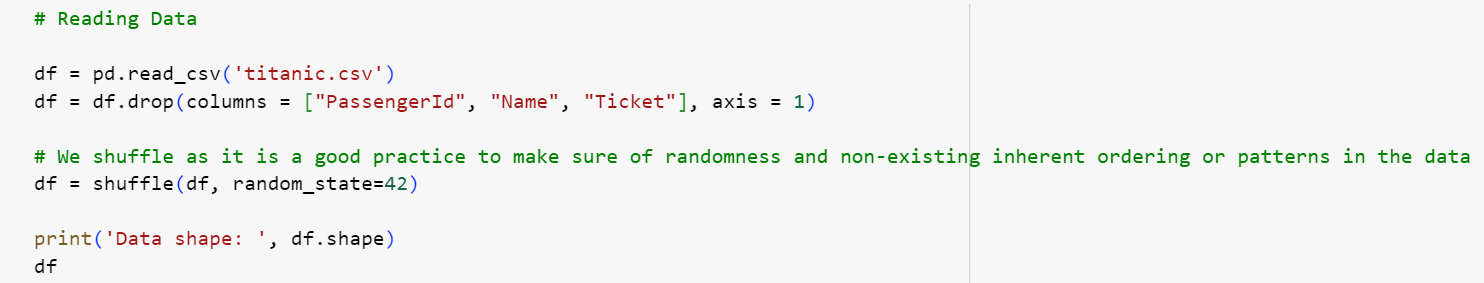

In [ ]:
#reading data
df = pd.read_csv("titanic.csv")
df = df.drop(columns = ["PassengerId","Name","Ticket","Cabin"], axis = 1)

#we shuffle as it is a good practice to make sure of randomness and non-existing inherent ordering or patterns in data
df = shuffle(df, random_state=42)

print('Data shape: ', df.shape)
df

# Examine the Distribution of the Target Column
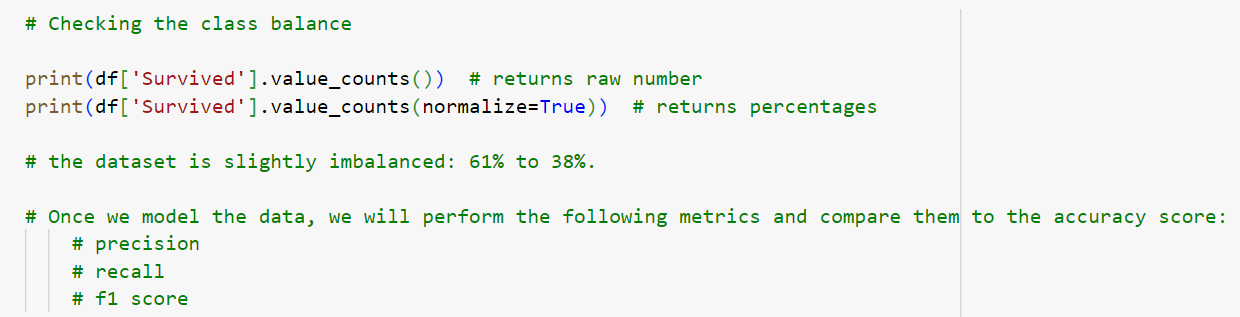

In [ ]:
#cheking the class balance

print(df['Survived'].value_counts()) # returns raw number
print(df['Survived'].value_counts(normalize=True)) # returns percentages

#the dataset is slightly imbalanced :61% to 38%

#once we model the data, we will perform the following metrics and compare them to the accuracy score:
    #precision
    #recall
    #f1 score

# Generate a countplot with Seaborn Countplot and the "hue" parameter
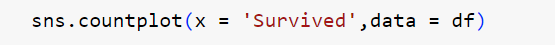

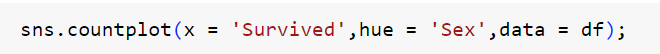

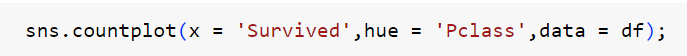

In [ ]:
sns.countplot(x = 'Survived', data = df)


In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)


In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = df)

# Handle Missing Data

### Handle Missing Data of Feature: Age

In [ ]:
### Option 1: (we will use Option 2 below)
#### Impute the missing age data with the mean of each passenger class

#def add_age(cols):
    #Age = cols[0]
    #Pclass = cols[1]
    #if pd.isnull(Age):
        #return int(df[df["Pclass"] == Pclass]["Age"].mean())
    #else:
       # return Age


#df['Age'] = df[['Age','Pclass']].apply(add_age,axis=1)

In [ ]:
# Option 2 - we will go with this option

# Consider every missing data in the age as a missing passenger
df["Age"] = df["Age"].fillna(-0.5)

### Handle Missing Data of Feature: Cabin
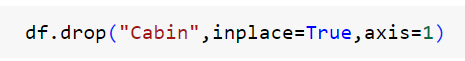

In [ ]:
df.drop("Cabin",inplace=True,axis=1)

### Handle Missing Data of Feature: Embarked
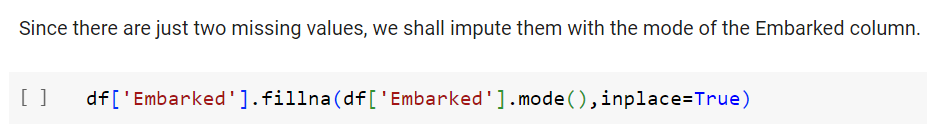

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

# Create a New Feature: FamilySize by combining Parch and SibSp


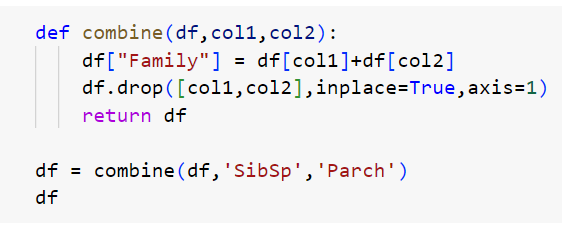

In [ ]:
def combine(df, col1, col2):
  df['Family'] = df[col1] + df[col2]
  df.drop([col1, col2], inplace=True, axis=1)
  return df

df =combine(df, 'SibSp', 'Parch')
df

# Convert Age Feature (it is a continuous data) Into An Age Range Feature (into a categorical data, you can call it Age_Group) and Create a Pivot Table for the newly created Field

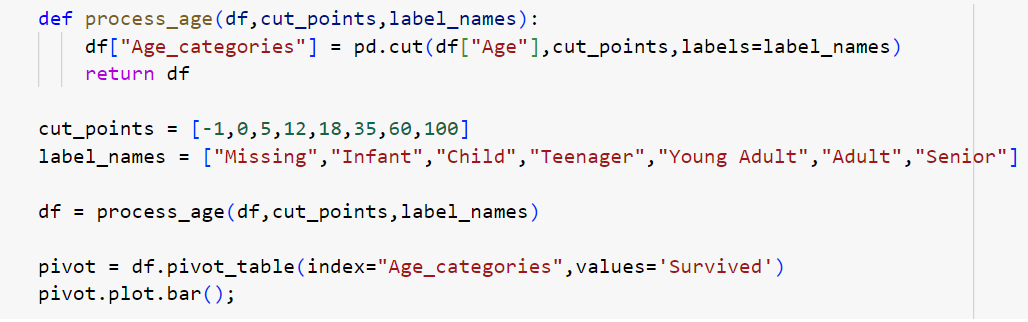

In [ ]:
def process_age(df, cut_points, label_names):
  df["Age_categories"] = pd.cut(df["Age"], cut_points, labels = label_names)
  return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

df = process_age(df, cut_points, label_names)

pivot = df.pivot_table(index="Age_categories", values="Survived")
pivot.plot.bar();

In [ ]:
# For age group :
# -1 to 0 => Missing
# 0 to 5 => Infant
# 5 to 12 => Child
# 12 to 18 => Teenager
# 18 to 35 => Young Adult
# 35 to 60 => Adult
# 60 to 100 => Senior



# Encode Categorical Variables with OneHotEncoder
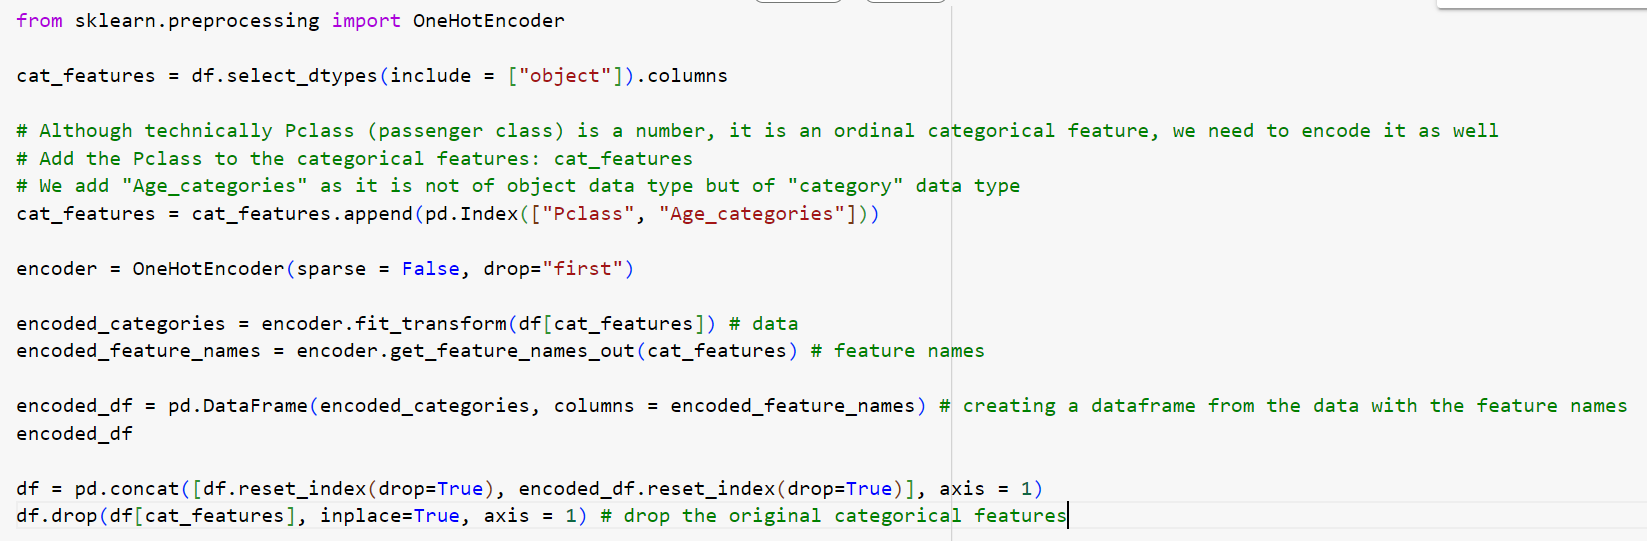

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = df.select_dtypes(include = ["object"]).columns

cat_features = cat_features.append(pd.Index(["Pclass", "Age_categories"]))

encoder = OneHotEncoder(sparse = False, drop="first")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Split the data into input variables and output variable
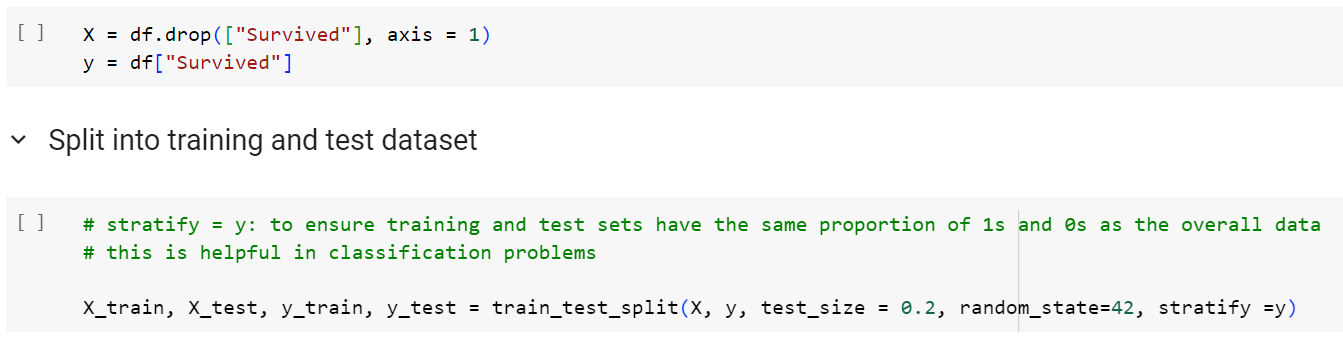

# Model the Data with Logistic Regression Algorithm
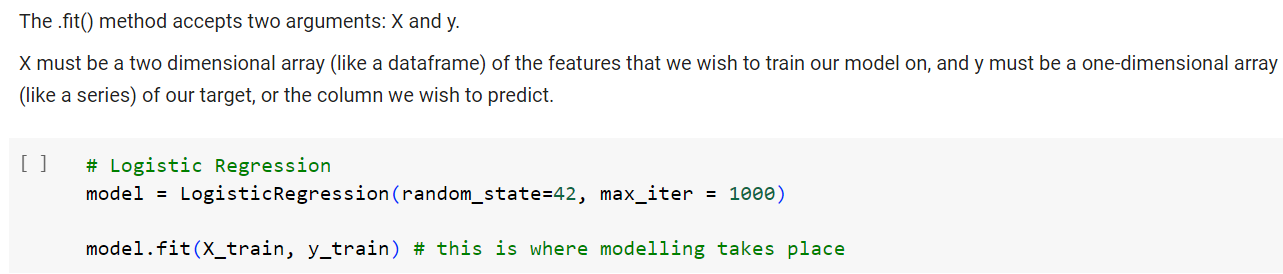

In [ ]:
# Complete the following lines:

# model =
# model.fit()
# y_pred =

# Construct Confusion Matrix

# Run the Relevant Metrics

### Accuracy Score

### Precision

### Recall

### F1 Score